### Question 1: Use the User dataset perform Random Forest and compare with Decision Tree.

In [2]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
user_data=pd.read_csv("D:/Letsupgrade_AIML/Datasets/User_Data - Arindam Dev.csv")
user_data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
# any null data is present or not
user_data.isna().any()

User ID            False
Gender             False
Age                False
EstimatedSalary    False
Purchased          False
dtype: bool

### Categorize the Gender data to numerical values

In [5]:
user_data['Male']=np.where(user_data['Gender']=='Male',1,0)
user_data['Female']=np.where(user_data['Gender']=='Female',1,0)
user_data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased,Male,Female
0,15624510,Male,19,19000,0,1,0
1,15810944,Male,35,20000,0,1,0
2,15668575,Female,26,43000,0,0,1
3,15603246,Female,27,57000,0,0,1
4,15804002,Male,19,76000,0,1,0


### Remove the User ID and Gender columns and arrange data in a structured way

In [6]:
user_data.drop(columns=["User ID","Gender"],axis=1,inplace=True)
user_data=pd.DataFrame(user_data,columns=["Male","Female","Age","EstimatedSalary","Purchased"])
user_data.head()

,Male,Female,Age,EstimatedSalary,Purchased
0,1,0,19,19000,0
1,1,0,35,20000,0
2,0,1,26,43000,0
3,0,1,27,57000,0
4,1,0,19,76000,0


### Split the data to Independent and Dependent variables

In [7]:
x=user_data.iloc[:,0:4].values
y=user_data.iloc[:,4].values
print(x.shape)
print(y.shape)

(400, 4)
(400,)


### Split the data to training and testing using sklearn

In [24]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.30,random_state=42)

In [25]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
xtrain=scaler.fit_transform(xtrain)
xtest=scaler.fit_transform(xtest)

### Using Decision Tree classifer

In [26]:
from sklearn.tree import DecisionTreeClassifier
classifier_dec=DecisionTreeClassifier(criterion='entropy',random_state=2)
classifier_dec.fit(xtrain,ytrain)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=2, splitter='best')

In [27]:
ypred=classifier_dec.predict(xtest)

In [28]:
ypred

array([1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0], dtype=int64)

Confusion matrix of User data using decision tree is:
 [[67  6]
 [ 7 40]]


<AxesSubplot:>

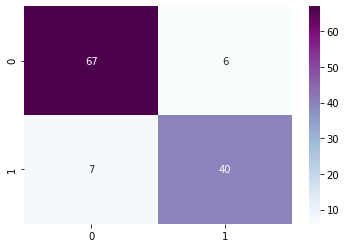

In [29]:
# confusion matrix
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,precision_score,recall_score
cm_dec=confusion_matrix(ytest,ypred)
print("Confusion matrix of User data using decision tree is:\n",cm_dec)
sns.heatmap(cm_dec,annot=True,cmap='BuPu')

In [30]:
# Classification report
report_dec=classification_report(ytest,ypred)
print("Classification report of user data using decision tree is:\n",report_dec)

Classification report of user data using decision tree is:
               precision    recall  f1-score   support

           0       0.91      0.92      0.91        73
           1       0.87      0.85      0.86        47

    accuracy                           0.89       120
   macro avg       0.89      0.88      0.89       120
weighted avg       0.89      0.89      0.89       120



In [31]:
# Accuracy score of User data using decision tree classifier
accuracy_dec=accuracy_score(ytest,ypred)*100
print("Accuracy Score of User data using decision tree classifier is:",accuracy_dec)

Accuracy Score of User data using decision tree classifier is: 89.16666666666667


[Text(176.44864864864866, 209.6742857142857, 'X[2] <= 0.484\nentropy = 0.928\nsamples = 280\nvalue = [184, 96]'),
 Text(90.4864864864865, 194.14285714285714, 'X[3] <= 0.588\nentropy = 0.661\nsamples = 204\nvalue = [169, 35]'),
 Text(54.29189189189189, 178.61142857142858, 'X[2] <= -0.106\nentropy = 0.245\nsamples = 172\nvalue = [165, 7]'),
 Text(45.24324324324325, 163.07999999999998, 'entropy = 0.0\nsamples = 115\nvalue = [115, 0]'),
 Text(63.340540540540545, 163.07999999999998, 'X[3] <= -0.091\nentropy = 0.537\nsamples = 57\nvalue = [50, 7]'),
 Text(54.29189189189189, 147.54857142857142, 'entropy = 0.0\nsamples = 27\nvalue = [27, 0]'),
 Text(72.3891891891892, 147.54857142857142, 'X[3] <= 0.381\nentropy = 0.784\nsamples = 30\nvalue = [23, 7]'),
 Text(63.340540540540545, 132.01714285714286, 'X[2] <= 0.386\nentropy = 0.736\nsamples = 29\nvalue = [23, 6]'),
 Text(36.1945945945946, 116.48571428571428, 'X[3] <= -0.003\nentropy = 0.65\nsamples = 24\nvalue = [20, 4]'),
 Text(27.145945945945947

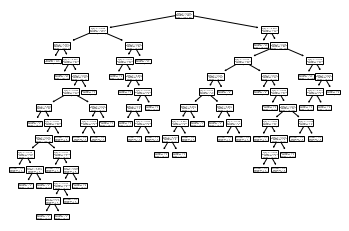

In [32]:
from sklearn import tree
tree.plot_tree(classifier_dec)

### Using Random Forest Classifier for User data

In [33]:
from sklearn.ensemble import RandomForestClassifier
classifier_rand=RandomForestClassifier(n_estimators=50,criterion='entropy',random_state=2)
classifier_rand.fit(xtrain,ytrain)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=2, verbose=0,
                       warm_start=False)

In [34]:
ypred=classifier_rand.predict(xtest)

In [35]:
ypred

array([1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0], dtype=int64)

Confusion matrix of User data using Random Forest classifier is:
 [[70  3]
 [ 6 41]]


<AxesSubplot:>

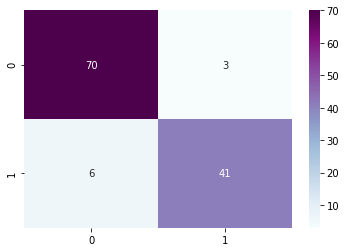

In [36]:
# confusion matrix
cm_rand=confusion_matrix(ytest,ypred)
print("Confusion matrix of User data using Random Forest classifier is:\n",cm_rand)
sns.heatmap(cm_rand,annot=True,cmap='BuPu')

In [37]:
# Classification report
report_rand=classification_report(ytest,ypred)
print("Classification report of user data using Random forest classifier is:\n",report_rand)

Classification report of user data using Random forest classifier is:
               precision    recall  f1-score   support

           0       0.92      0.96      0.94        73
           1       0.93      0.87      0.90        47

    accuracy                           0.93       120
   macro avg       0.93      0.92      0.92       120
weighted avg       0.93      0.93      0.92       120



In [38]:
# Accuracy score of User data using Random Forest classifier
accuracy_rand=accuracy_score(ytest,ypred)*100
print("Accuracy Score of User data using Random Forest classifier is:",accuracy_rand)

Accuracy Score of User data using Random Forest classifier is: 92.5


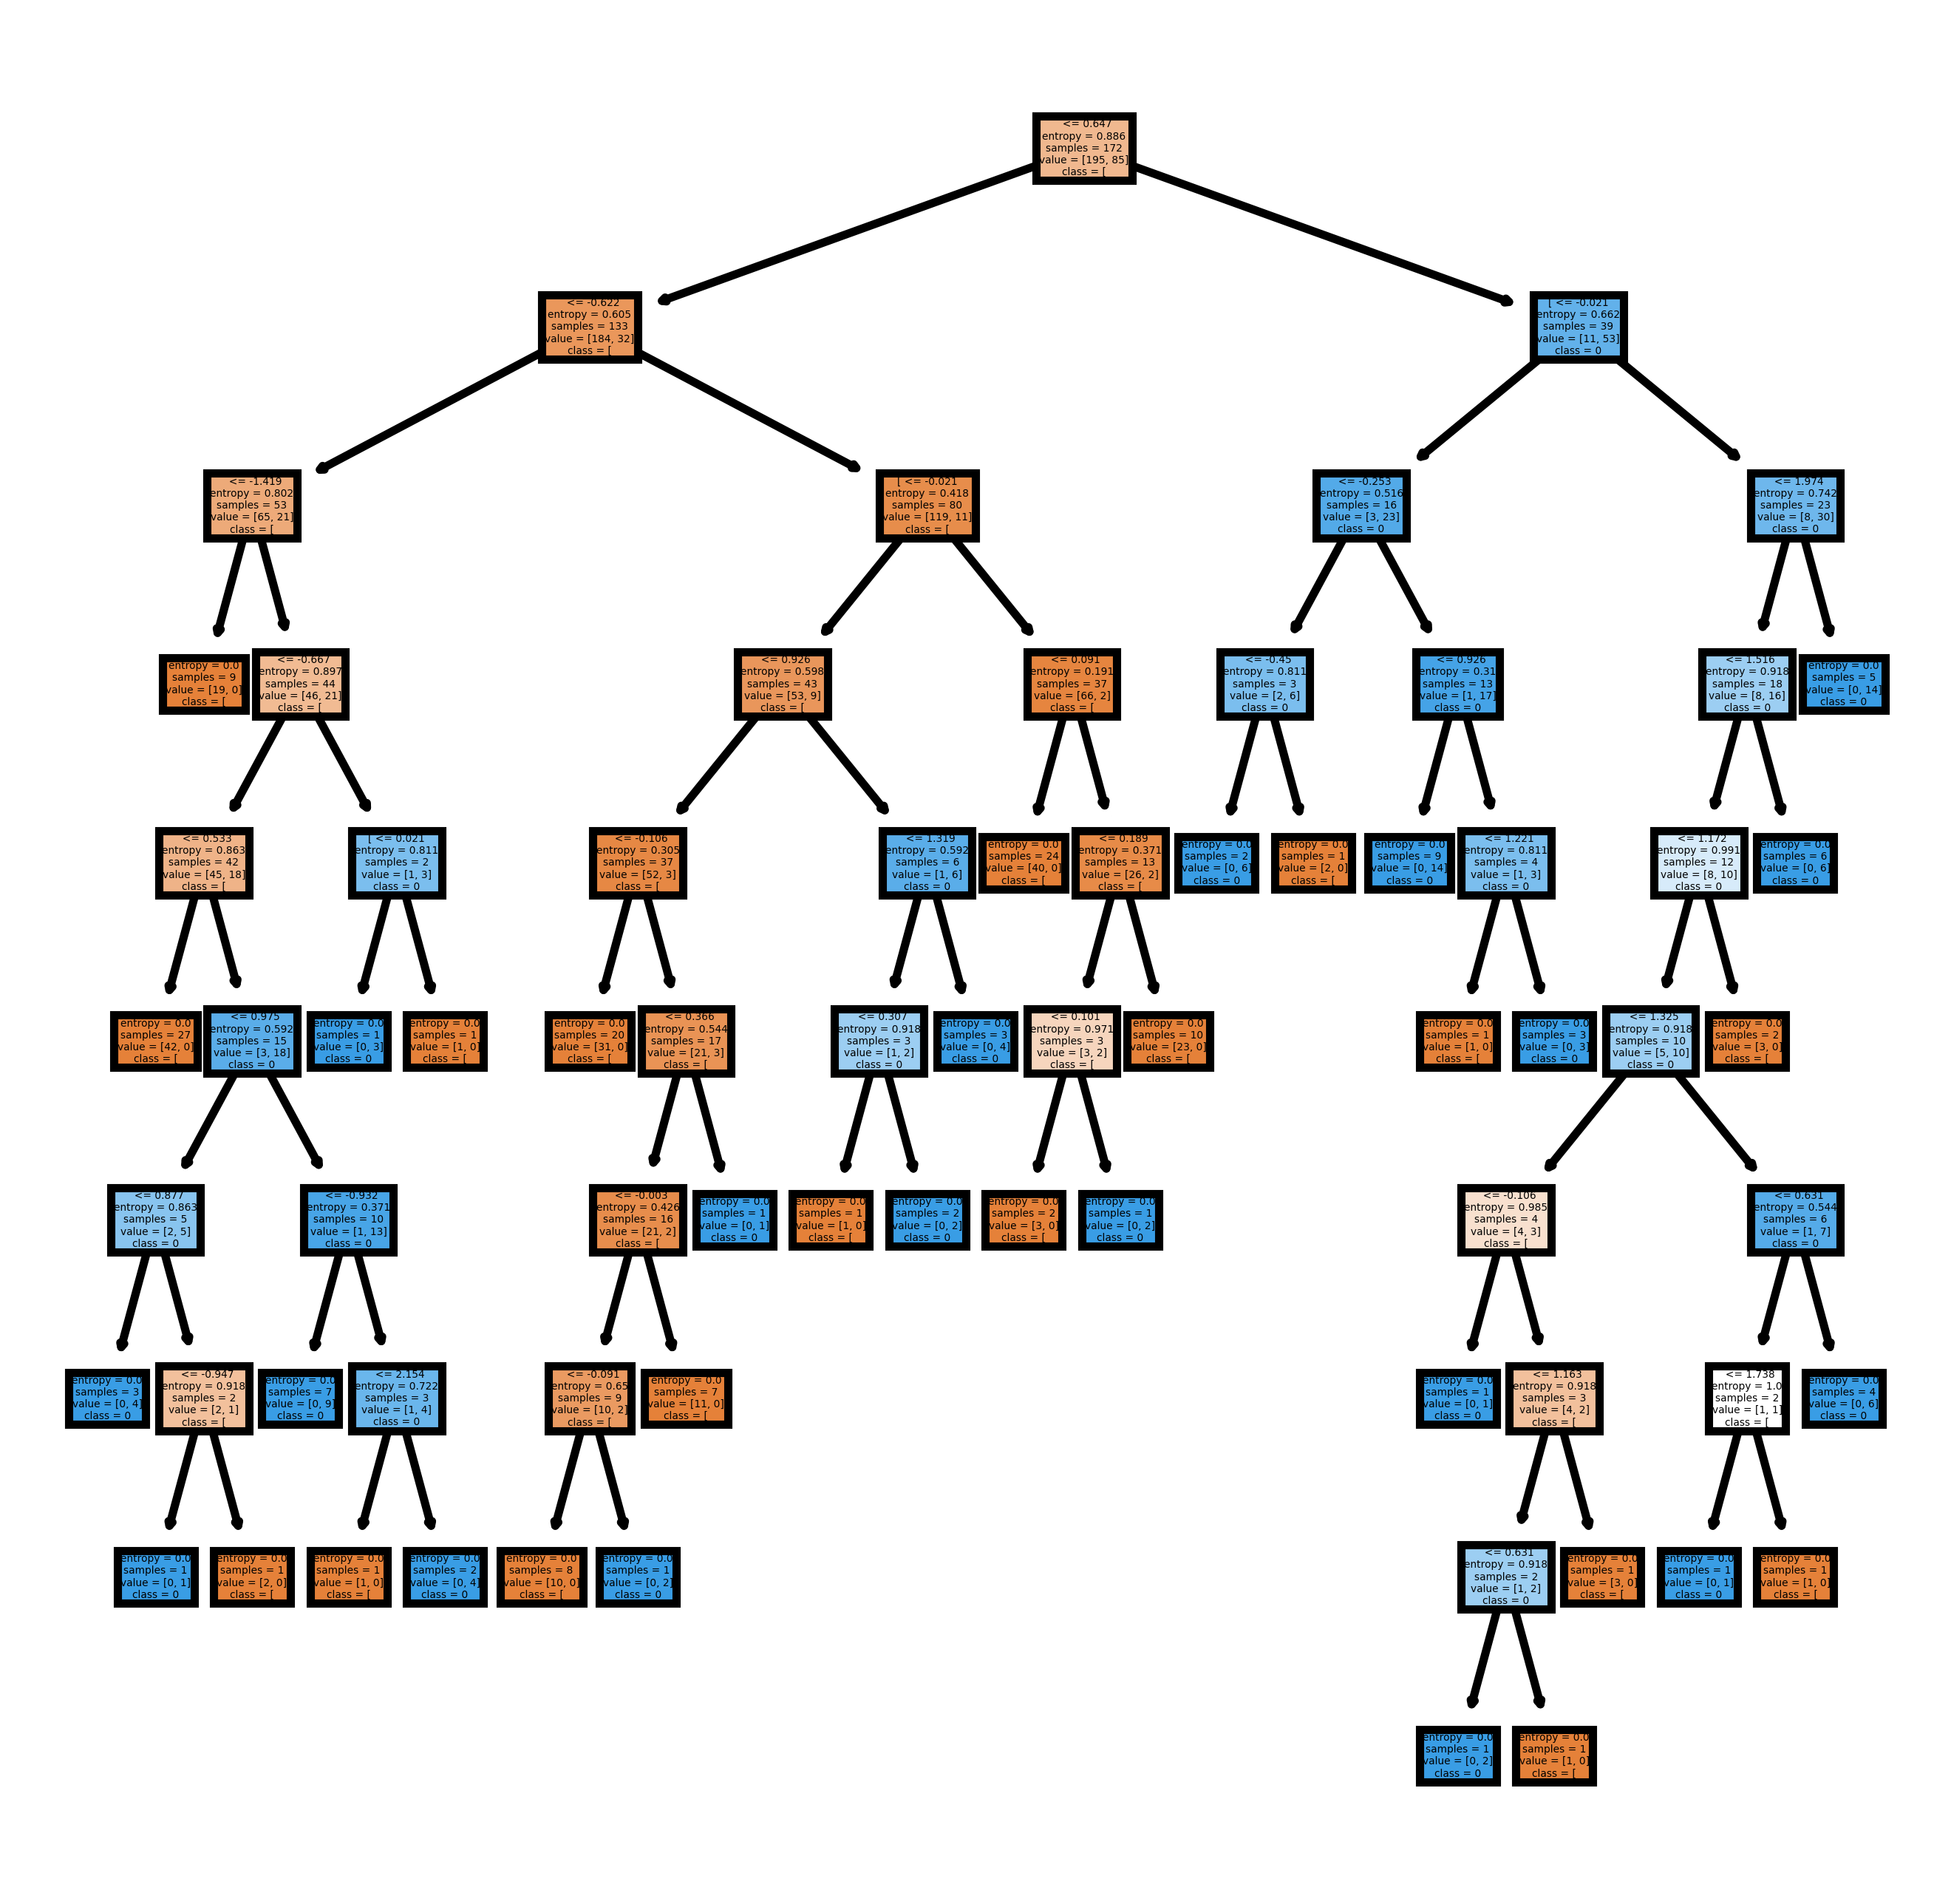

In [39]:
fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(4,4),dpi=800)
tree.plot_tree(classifier_rand.estimators_[0],feature_names=str(x),class_names=str(y),filled=True);

### Accuracy Score of User data using Random Forest classifier is: 92.5 % when compared to decision tree classifier accuracy is: 89.1%